<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#aec101"> Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#aec101">Case study 1 
    <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#b53f05"> (Titanic Data Set)


### Problem Feature:
The sinking of the Titanic is one of the most infamous shipwrecks in history. **On April 15, 1912**, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing **1502 out of 2224** passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

1.  **Age** ==>> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

2. **Sibsp** ==>> The dataset defines family relations in this way...

    a. Sibling = brother, sister, stepbrother, stepsister

    b. Spouse = husband, wife (mistresses and fiancés were ignored)

3. **Parch** ==>> The dataset defines family relations in this way...

    a. Parent = mother, father

    b. Child = daughter, son, stepdaughter, stepson

    c. Some children travelled only with a nanny, therefore parch=0 for them.

4. **Pclass** ==>> A proxy for socio-economic status (SES)

    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
    
5. **Embarked** ==>> nominal datatype 
6. **Name** ==>> nominal datatype . It could be used in feature engineering to derive the gender from title
7. **Sex** ==>>  nominal datatype 
8. **Ticket** ==>> that have no impact on the outcome variable. Thus, they will be excluded from analysis
9. **Cabin** ==>>  is a nominal datatype that can be used in feature engineering
11. **Fare** ==>>  Indicating the fare
12. **PassengerID ** ==>> have no impact on the outcome variable. Thus, it will be excluded from analysis
11. **Survival** is ==>> **[dependent variable], 0 or 1



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.1 Loading the libraries

In [52]:
# Calling Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.2 import the dataset ?

In [84]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.3 How to see the size of your data?

In [17]:
df.size

10692

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.4 How to view the statistical characteristics of the data?

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.5 How to see just one column.describe()?

In [18]:
df['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.6 How to check the column names?

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.7 Check the Numerical Features,Categorical Features, Alphanumeric Features?

    * Categorical: 
    * Numerical Features: 
    * Alphanumeric Features: 

In [ ]:
df.select_dtypes()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.8 Categorical vs. Quantitative

    * Categorical: 
    * Numerical Features: 

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.8a) Create bar plot for showing Sex Vs Survived. And your Observation?

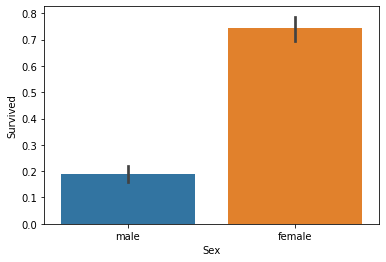

The percentages of females vs. males that survive

female    68.128655
male      31.871345
Name: Sex, dtype: float64


In [40]:

#draw a bar plot of survival by sex
sns.barplot(x=df['Sex'], y=df['Survived'])
plt.show()
#print percentages of females vs. males that survive
print("The percentages of females vs. males that survive\n")
print((df['Sex'][df['Survived']==1].value_counts()/342)*100)

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observation:


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">1.8d) Create a bar plot Pclass Vs Survived.And your Observation?

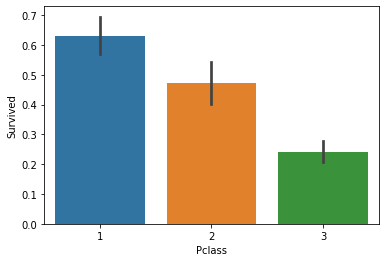

The percentages of 1st vs. 2nd and 3rd class

1    39.766082
3    34.795322
2    25.438596
Name: Pclass, dtype: float64


In [47]:
# Create subplot
sns.barplot(x=df['Pclass'],y=df['Survived'])
plt.show()
#print percentages of 1st vs. 2nd and 3rd class
print("The percentages of 1st vs. 2nd and 3rd class\n")
print((df['Pclass'][df['Survived']==1].value_counts()/342)*100)

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observation:



<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.8c) Create Bar plot for checking the both Survived vs Sex and Sex:Survived or Not. And your Observations?

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


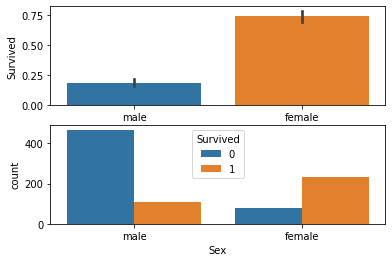

In [65]:
#create a subplot
plt.subplot(2,1,1)
s = sns.barplot(x = df.Sex, y = df.Survived)

# create bar plot using groupby
d = df.groupby(by = "Sex")
po = d.Survived.value_counts()
print(po)
# create count plot
plt.subplot(2,1,2)
d = sns.countplot(df.Sex, hue = df.Survived)



<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101">  Observation:
   

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  1.8d) Create Bar plot for checking the following:
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  Number Of Passengers By Pclass & 
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  Pclass:Survived vs Dead. 

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


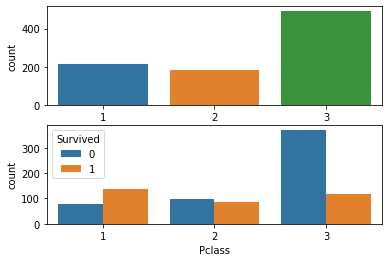

In [67]:
# create subplot plot
plt.subplot(2,1,1)
sns.countplot(df.Pclass)
# create bar plot using groupby
f = df.groupby(by = 'Pclass')
po = f.Survived.value_counts()
print(po)




# create count plot
plt.subplot(2,1,2)
d = sns.countplot(df.Pclass, hue = df.Survived)




<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101">  Observation:


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  1.8e) Create violinplot plot for checking 
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">    a) Pclass vs. Age sliced by Survived 
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">    b) Sex vs Age sliced by Survived. And your Observations?

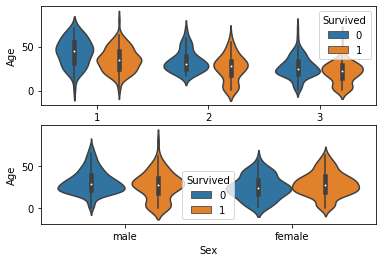

In [71]:
# create subplot plot
plt.subplot(2,1,1)
sns.violinplot(df.Pclass,df.Age, hue=df.Survived)
# create violinplot plot using groupby
plt.subplot(2,1,2)
sns.violinplot(df.Sex,df.Age, hue=df.Survived)


<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observations:
    
    

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.8f) Create Bar(count) plot for checking the Embarked vs (No. of passengers, sex, Survived , Pclass). And your Observations?

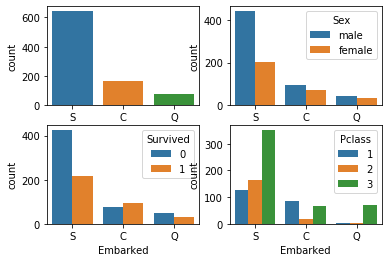

In [80]:
# create subplot plot

# create Bar (count) plot for Embarked vs. No. Of Passengers Boarded
plt.subplot(2,2,1)
sns.countplot(x=df.Embarked)
# create Bar (count) plot for Embarked vs. Male-Female Split
plt.subplot(2,2,2)
sns.countplot(x=df.Embarked, hue=df.Sex)
# create Bar (count) plot for Embarked vs Survived
plt.subplot(2,2,3)
sns.countplot(x=df.Embarked, hue=df.Survived)
# create Bar (count) plot for Embarked vs Pclass
plt.subplot(2,2,4)
sns.countplot(x=df.Embarked, hue=df.Pclass)

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observations:

  

### Box Plot
A box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">1.8 g)Create a box plot for pclass vs Age. And your Observations?

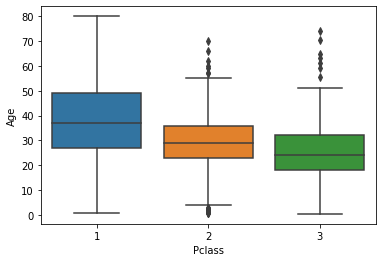

In [81]:
sns.boxplot(x=df.Pclass,y=df.Age)

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observations: 
   

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.9 Categorical vs. Categorical

* Categorical: 

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.9a) Create a Stacked bar chart Sex Vs Survived. And your Observations?

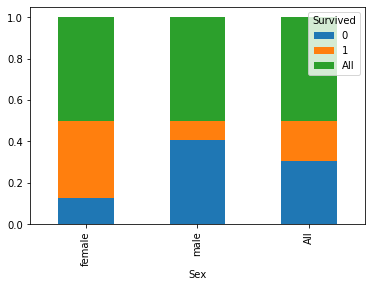

In [95]:
#create crosstab
cr = pd.crosstab(index=df.Sex,columns=df.Survived,dropna=False,margins=True)
#sns.barplot(titanic.Sex,titanic.Survived)
n = cr.div(cr.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

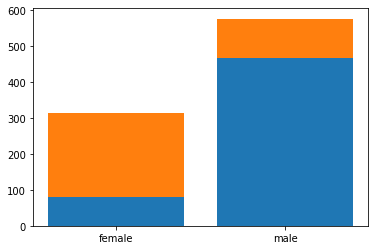

In [97]:
#create crosstab
the_tab = pd.crosstab(index=df['Sex'], columns = df['Survived'])
plt.bar(the_tab.index,the_tab[0])
plt.bar(the_tab.index,the_tab[1],bottom=the_tab[0])
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observations:
   

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.10 Quantitative vs. Quantitative

    Numerical Features:

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  1.10a) Create a scatter plot for showing age & fare with target varialble. And your Observations?¶

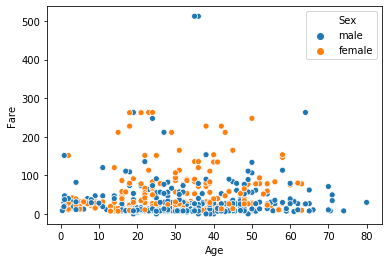

In [87]:
sns.scatterplot(df.Age,df.Fare, hue=df.Sex)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#aec101"> Observation:
   

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.11 Frequency tables 

1. One-Way Tables
2. Two-Way Tables

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.11 a) Create frequency tables (also known as crosstabs) in pandas using the pd.crosstab() function. 

In [91]:
# Make a crosstab
print(pd.crosstab(index=df.Sex,columns=df.Survived,dropna=False,margins=True, colnames=['Countcolumn']))
# Name the count column


Countcolumn    0    1  All
Sex                       
female        81  233  314
male         468  109  577
All          549  342  891


#### Two-Way Tables

Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">1.11b )Create Two-way-table for survival vs sex?

In [99]:
print(pd.crosstab(index=df.Sex,columns=df.Survived,dropna=False,margins=True))

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.12 Check Correlation plot using Headtmap?

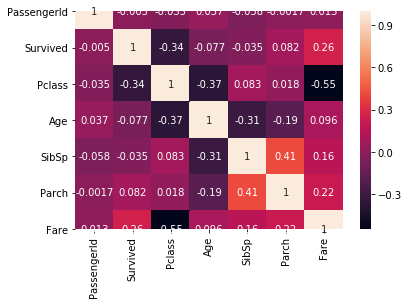

In [92]:
df.corr()
sns.heatmap(df.corr(), annot=True)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#aec101"> Observation:




<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.12 a) Check the pairplot?

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


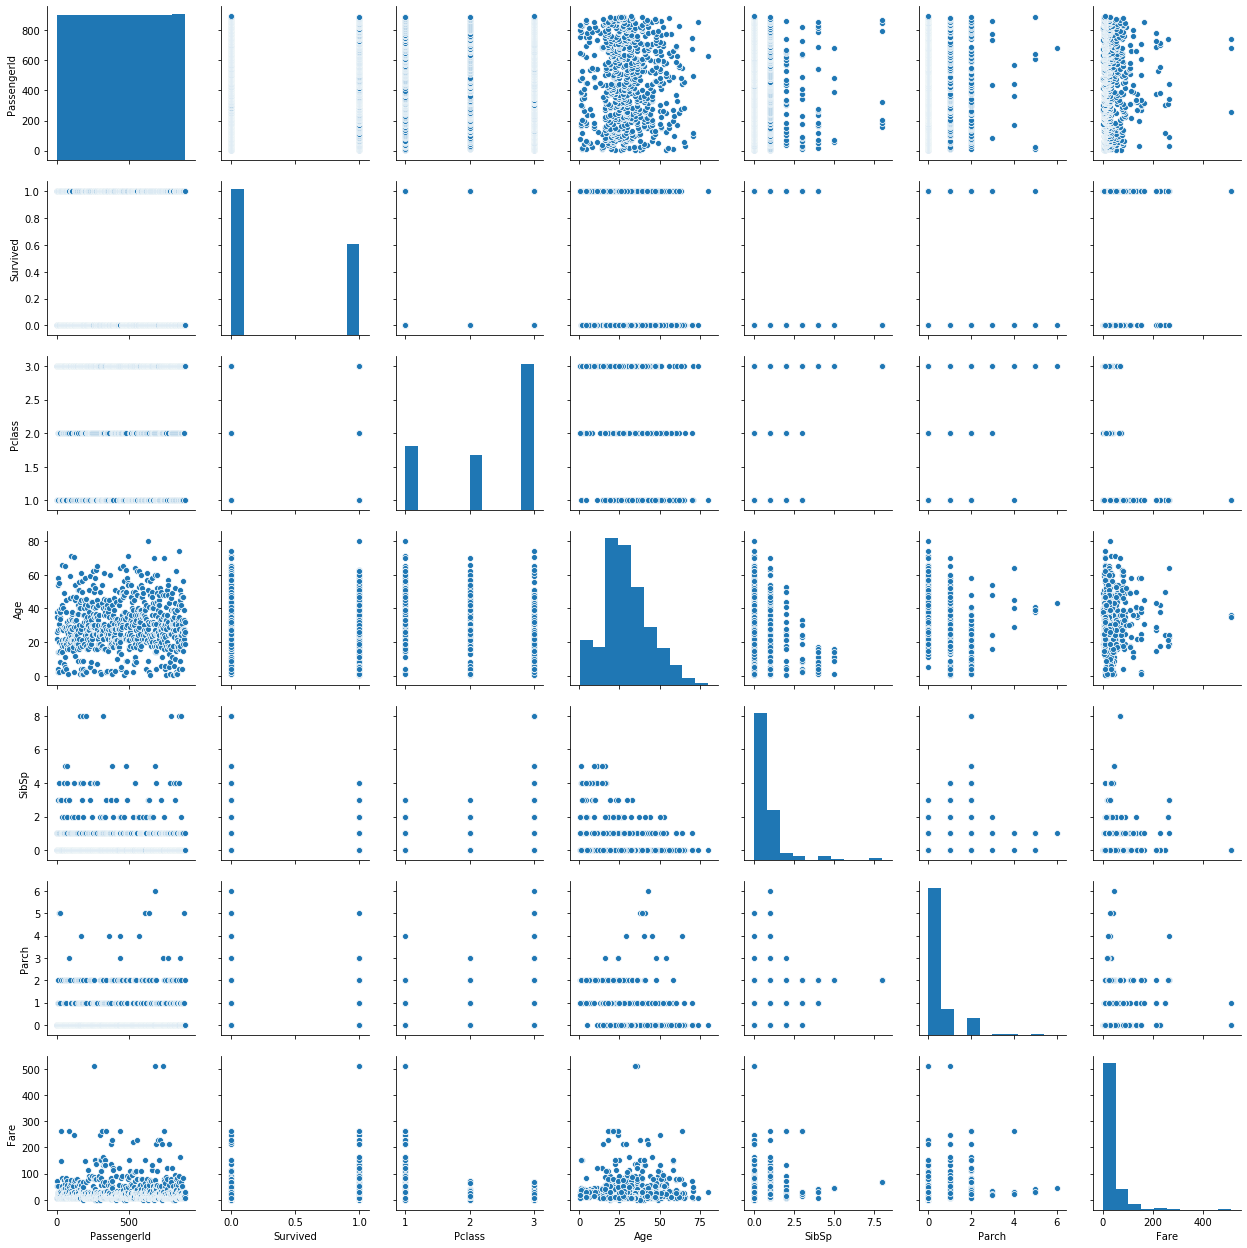

In [93]:

sns.pairplot(df)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#aec101"> Observation:
    
 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.13 Read the AirPassengers dataset and plot the Seasonality.And your observations?

In [101]:
data = pd.read_csv('AirPassengers.csv')
#Parse strings to datetime type
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True) 
#convert from string to datetime
data = data.set_index(['Month'])

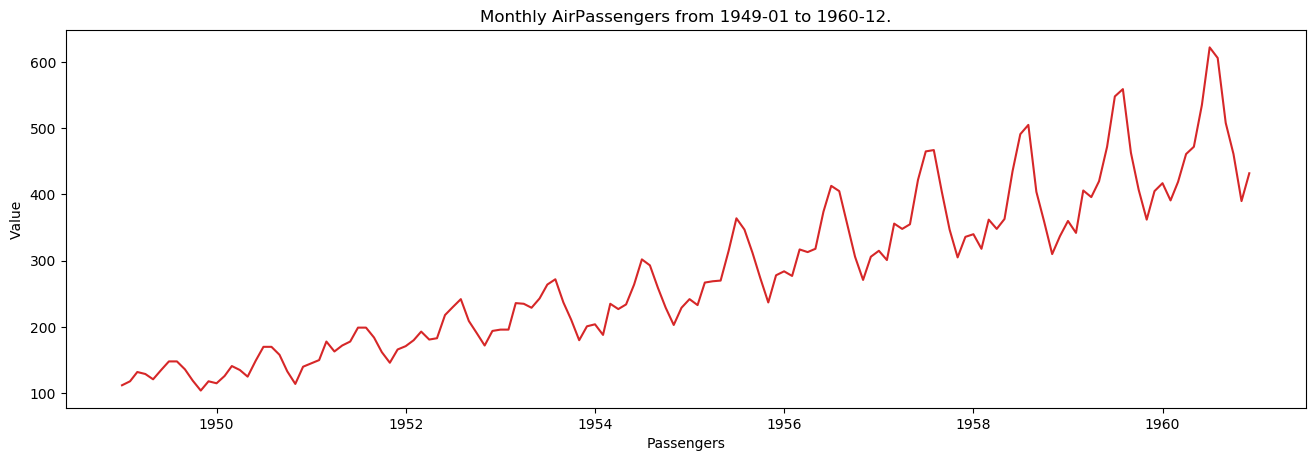

In [102]:

def plot_df(data, x, y, title="", xlabel='Passengers', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data['#Passengers'], title='Monthly AirPassengers from 1949-01 to 1960-12.') 

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101">Observations:
    

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:##e08484"> THE END